In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Data Ingestion

In [2]:
df =pd.read_csv('weather_data.csv')
df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.0,10.0,Sunny
1,01/02/2023,New York,NaN,65.0,12.0,Cloudy
2,03-01-2023,New York,7.0,NaN,8.0,Rainy
3,NaN,London,8.0,70.0,15.0,Unknown
4,2023-01-02,London,6.0,75.0,20.0,Snowy
...,...,...,...,...,...,...
95,01-01-2023,London,NaN,NaN,NaN,Rainy
96,09-01-2023,London,NaN,NaN,NaN,Rainy
97,2023-01-11,Tokyo,NaN,NaN,NaN,Sunny
98,15/01/2023,New York,NaN,41.0,24.3,NaN


In [3]:
df.isnull().sum()

date                   20
city                    0
temperature_celsius    58
humidity_percent       53
wind_speed_kph         45
weather_condition      16
dtype: int64

# 2.Data Cleaning and Trnsformation

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
numerical_cols = df.select_dtypes(include = ['number']).columns
print('Numerical columns:', numerical_cols.tolist())

Numerical columns: ['temperature_celsius', 'humidity_percent', 'wind_speed_kph']


In [6]:
catagorical_cols = df.select_dtypes(include=['object']).columns
print('Catagorical Columns:', catagorical_cols.tolist())

Catagorical Columns: ['date', 'city', 'weather_condition']


In [7]:
imputer_1 = SimpleImputer(strategy ='mean')
df[numerical_cols] = imputer_1.fit_transform(df[numerical_cols])
imputer_2 = SimpleImputer(strategy = 'most_frequent')
df[catagorical_cols] = imputer_2.fit_transform(df[catagorical_cols])
df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny
1,01/02/2023,New York,8.4,65.000000,12.000000,Cloudy
2,03-01-2023,New York,7.0,58.978723,8.000000,Rainy
3,14.01.2023,London,8.0,70.000000,15.000000,Unknown
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy
...,...,...,...,...,...,...
95,01-01-2023,London,8.4,58.978723,14.352727,Rainy
96,09-01-2023,London,8.4,58.978723,14.352727,Rainy
97,2023-01-11,Tokyo,8.4,58.978723,14.352727,Sunny
98,15/01/2023,New York,8.4,41.000000,24.300000,Unknown


In [8]:
df['temperature_fahrenheit'] = df['temperature_celsius'] * 9 / 5 + 32
df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny,41.00
1,01/02/2023,New York,8.4,65.000000,12.000000,Cloudy,47.12
2,03-01-2023,New York,7.0,58.978723,8.000000,Rainy,44.60
3,14.01.2023,London,8.0,70.000000,15.000000,Unknown,46.40
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy,42.80
...,...,...,...,...,...,...,...
95,01-01-2023,London,8.4,58.978723,14.352727,Rainy,47.12
96,09-01-2023,London,8.4,58.978723,14.352727,Rainy,47.12
97,2023-01-11,Tokyo,8.4,58.978723,14.352727,Sunny,47.12
98,15/01/2023,New York,8.4,41.000000,24.300000,Unknown,47.12


In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['date'] = df['date'].dt.strftime('%y-%m-%d')
df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
0,23-01-01,New York,5.0,60.000000,10.000000,Sunny,41.00
1,NaN,New York,8.4,65.000000,12.000000,Cloudy,47.12
2,NaN,New York,7.0,58.978723,8.000000,Rainy,44.60
3,NaN,London,8.0,70.000000,15.000000,Unknown,46.40
4,23-02-01,London,6.0,75.000000,20.000000,Snowy,42.80
...,...,...,...,...,...,...,...
95,NaN,London,8.4,58.978723,14.352727,Rainy,47.12
96,NaN,London,8.4,58.978723,14.352727,Rainy,47.12
97,23-11-01,Tokyo,8.4,58.978723,14.352727,Sunny,47.12
98,NaN,New York,8.4,41.000000,24.300000,Unknown,47.12


In [10]:
df = df[(df['weather_condition'].str.lower() != 'unknown')]

df

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
0,23-01-01,New York,5.0,60.000000,10.000000,Sunny,41.00
1,NaN,New York,8.4,65.000000,12.000000,Cloudy,47.12
2,NaN,New York,7.0,58.978723,8.000000,Rainy,44.60
4,23-02-01,London,6.0,75.000000,20.000000,Snowy,42.80
5,NaN,London,8.4,80.000000,18.000000,Cloudy,47.12
6,23-01-01,Tokyo,10.0,50.000000,5.000000,Sunny,50.00
7,NaN,Tokyo,12.0,55.000000,6.000000,Cloudy,53.60
9,NaN,New York,8.4,51.000000,20.300000,Sunny,47.12
12,NaN,New York,8.4,58.978723,17.900000,Snowy,47.12
14,NaN,London,8.4,56.000000,14.352727,RAINY,47.12


In [11]:
os.makedirs('outputs', exist_ok=True)
df.to_csv('outputs/transformed_weather_data.csv', index=False)

In [12]:
df.loc[:, 'temperature_celsius'] = pd.to_numeric(df['temperature_celsius'],  errors='coerce')
top5_highest = df.nlargest(5, 'temperature_celsius')

In [13]:
top5_highest

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
21,NaN,Tokyo,19.3,43.000000,14.352727,RAINY,66.74
64,NaN,London,18.1,59.000000,1.000000,Snowy,64.58
55,NaN,New York,13.4,58.978723,14.352727,Snowy,56.12
34,NaN,New York,12.9,58.978723,5.700000,Sunny,55.22
70,NaN,New York,12.2,58.978723,16.500000,RAINY,53.96


In [14]:
with open('outputs/top5_highest_cities.txt', 'w') as file:
    file.write(top5_highest.to_string(index=False))
    

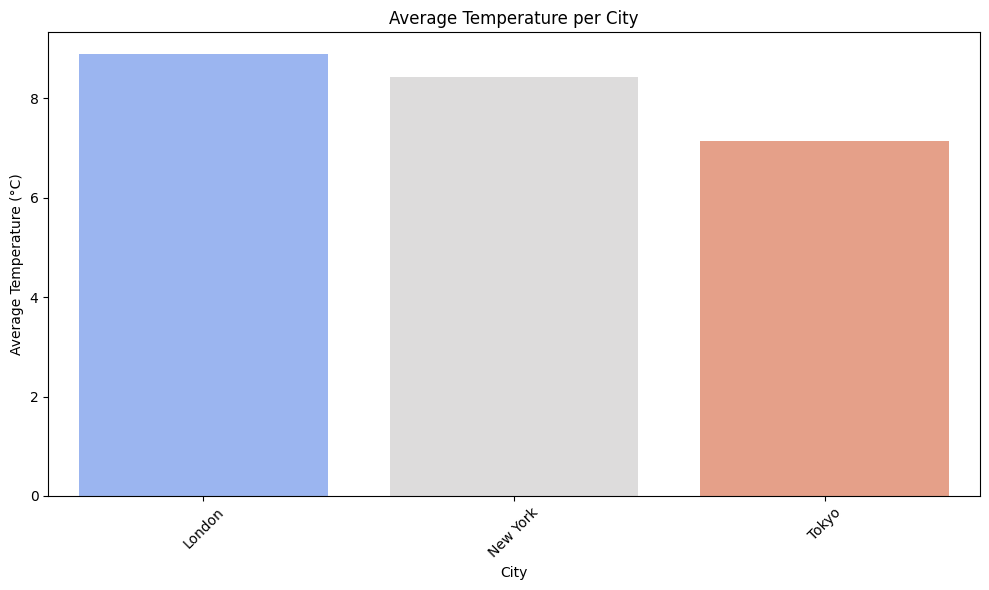

In [15]:
avg_temp = df.groupby('city')['temperature_celsius'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_temp, x='city', y='temperature_celsius', palette='coolwarm', hue='city')
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('outputs/average_temperature_per_city.png')
plt.show()